In [1]:
import requests
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.2.2


In [2]:
all_data = pd.read_csv(r"C:\Users\Dell\Downloads\full_data_1.csv")

In [3]:
all_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,20.0,0,0,No,Private,Rural,70.96,NaN,Unknown,0
1,Female,9.0,0,0,No,children,Urban,95.81,NaN,Unknown,0
2,Female,3.0,0,0,No,children,Urban,79.63,NaN,Unknown,0
3,Female,6.0,0,0,No,children,Urban,201.25,NaN,Unknown,0
4,Female,71.0,0,0,Yes,Private,Urban,214.77,NaN,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5225,Male,87.0,1,1,No,Private,Urban,110.00,38.0,smokes,1
5226,Male,87.0,1,1,No,Private,Urban,110.00,38.0,smokes,1
5227,Male,87.0,1,1,No,Private,Urban,110.00,38.0,smokes,1
5228,Male,87.0,1,1,No,Private,Urban,110.00,38.0,smokes,1


In [4]:
from sklearn.impute import SimpleImputer #to fill in the missing values

In [5]:
imputer = SimpleImputer(strategy='mean')
all_data['bmi'] = imputer.fit_transform(all_data[['bmi']])

In [6]:
all_data.isna().sum() #to check and display the number of missing values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
target = 'stroke'
X = all_data.loc[:,all_data.columns!=target]
y = all_data.loc[:,all_data.columns==target]

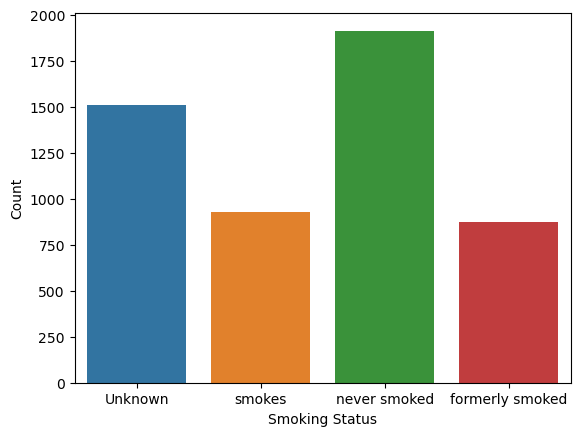

In [8]:
import seaborn as sns
sns.countplot(x='smoking_status', data=all_data)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

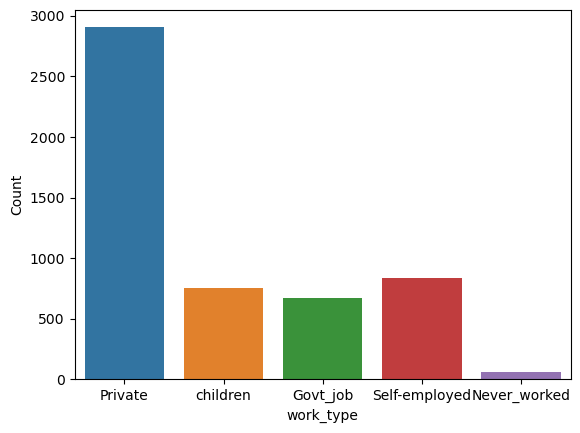

In [9]:
sns.countplot(x='work_type', data=all_data)
plt.xlabel('work_type')
plt.ylabel('Count')
plt.show()

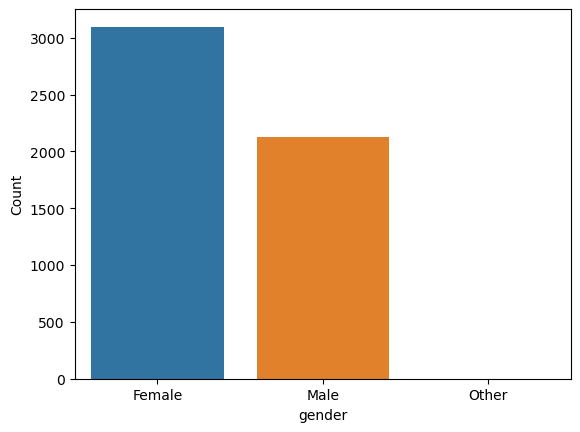

In [10]:
sns.countplot(x='gender', data=all_data)
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

In [11]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columns])

0    4689
1     541
Name: stroke, dtype: int64


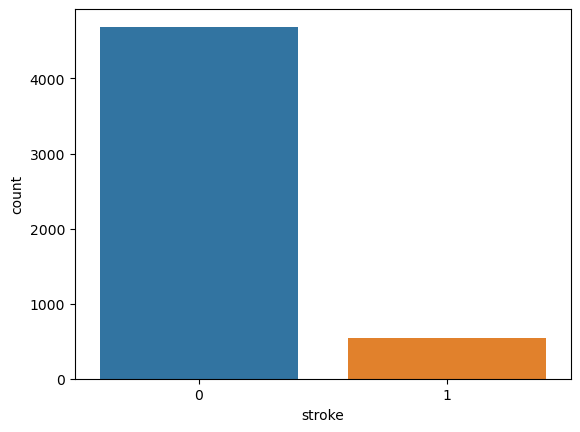

In [12]:
ax = sns.countplot(x=target,data=all_data) #seaborn plot garne count plot y axis x ma stroke halne
print(all_data[target].value_counts())

In [13]:
percentage_no_stroke = 100*(4733/float(all_data.shape[0])) #total number of cases
percentage_no_stroke

90.49713193116635

In [14]:
percentage_yes_stroke = 100*(248/float(all_data.shape[0]))
percentage_yes_stroke

4.74187380497132

In [15]:
import seaborn as sns
from sklearn.datasets import make_classification


In [16]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

0    4689
1    4689
Name: stroke, dtype: int64


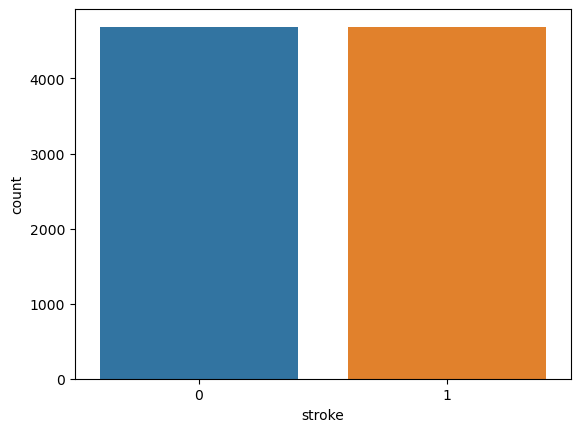

In [17]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

In [19]:
print(Y_train[target].value_counts())


0    3779
1    3723
Name: stroke, dtype: int64


In [20]:
min_values = X_train.min()
max_values = X_train.max()
print("Min Values:", min_values)
print("Max Values:", max_values)


Min Values: age                                0.08
hypertension                       0.00
heart_disease                      0.00
avg_glucose_level                 55.22
bmi                               10.30
gender_Female                      0.00
gender_Male                        0.00
gender_Other                       0.00
ever_married_No                    0.00
ever_married_Yes                   0.00
work_type_Govt_job                 0.00
work_type_Never_worked             0.00
work_type_Private                  0.00
work_type_Self-employed            0.00
work_type_children                 0.00
Residence_type_Rural               0.00
Residence_type_Urban               0.00
smoking_status_Unknown             0.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        0.00
smoking_status_smokes              0.00
dtype: float64
Max Values: age                                92.0
hypertension                        1.0
heart_disease                       1.0
a

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,y, test_size=0.10, shuffle=True)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [25]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250, 500]})

In [26]:
best_params = grid_search.best_params_

In [27]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [28]:
best_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100
)

In [29]:
 random_forest_en=best_rf_model.fit(X_train, Y_train.values.ravel())

In [32]:
y_pred=best_rf_model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       470
           1       0.98      0.96      0.97       468

    accuracy                           0.97       938
   macro avg       0.97      0.97      0.97       938
weighted avg       0.97      0.97      0.97       938



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9722814498933902
Precision: 0.982532751091703
Recall: 0.9615384615384616
F1 Score: 0.9719222462203023


In [35]:
feature_importances = random_forest_en.feature_importances_
feature_names = X.columns


Feature Importance Scores:
                           Feature  Importance
3                avg_glucose_level    0.210371
0                              age    0.145044
4                              bmi    0.095795
1                     hypertension    0.064015
2                    heart_disease    0.060966
17          smoking_status_Unknown    0.059615
12               work_type_Private    0.042118
19     smoking_status_never smoked    0.039339
6                      gender_Male    0.038721
5                    gender_Female    0.034480
15            Residence_type_Rural    0.031764
16            Residence_type_Urban    0.031573
13         work_type_Self-employed    0.028241
18  smoking_status_formerly smoked    0.027704
10              work_type_Govt_job    0.023024
9                 ever_married_Yes    0.022243
20           smoking_status_smokes    0.021204
8                  ever_married_No    0.016141
14              work_type_children    0.006488
11          work_type_Never_work

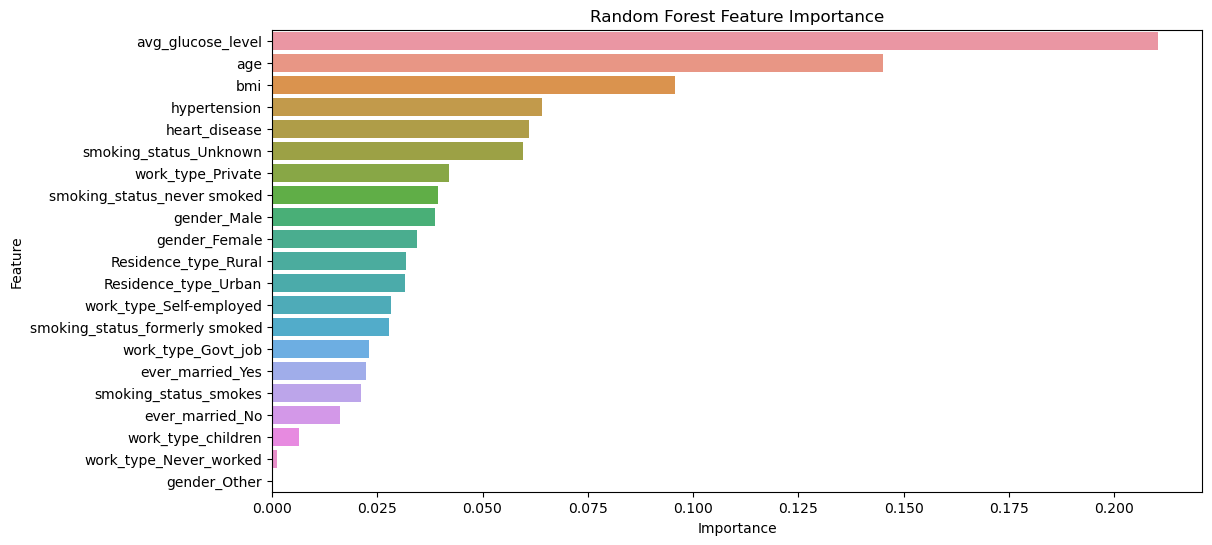

In [36]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("\nFeature Importance Scores:")
print(feature_importance_df)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

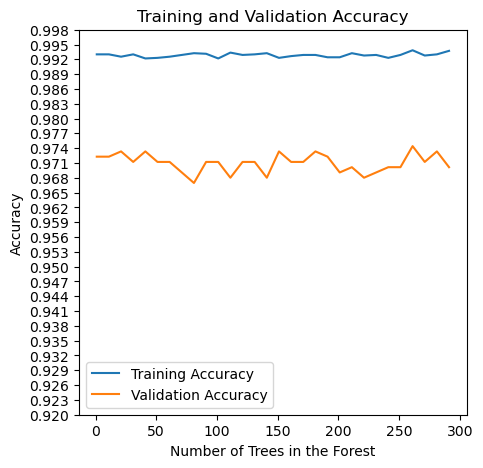

In [37]:
#plotting the verification and validation curve
train_scores = []
test_scores = []
tree_range = np.arange(1, 301, 10)

for trees in tree_range:
    model = best_rf_model.fit(X_train, Y_train.values.ravel())
    train_scores.append(model.score(X_train, Y_train))
    test_scores.append(model.score(X_test, Y_test))

# Plotting the training curve
plt.figure(figsize=(5, 5))
plt.plot(tree_range, train_scores, label='Training Accuracy')
plt.plot(tree_range, test_scores, label='Validation Accuracy')
plt.xlabel('Number of Trees in the Forest')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.yticks(np.arange(0.92, 1, 0.003))
plt.savefig("accuracy.jpg")
plt.show()

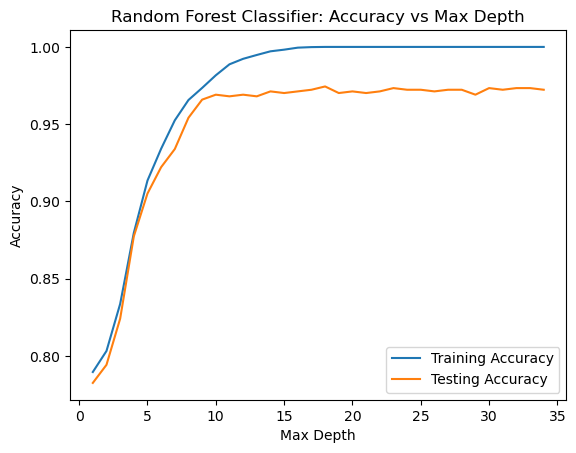

Accuracy: 0.9722814498933902


In [38]:
train_score = []
test_score = []

for i in np.arange(1, 35):
    param_grid = { 'max_depth':[i],
    'min_samples_leaf':[1],
    'min_samples_split':[2],
    'n_estimators':[250]}
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train.values.ravel())
    
    y_pred_train = grid_search.predict(X_train)
    train_score.append(accuracy_score(Y_train, y_pred_train))
    
    y_pred_test = grid_search.predict(X_test)
    test_score.append(accuracy_score(Y_test, y_pred_test))

plt.title("Random Forest Classifier: Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1, 35), train_score, label="Training Accuracy")
plt.plot(np.arange(1, 35), test_score, label="Testing Accuracy")
plt.legend()
plt.show()


y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

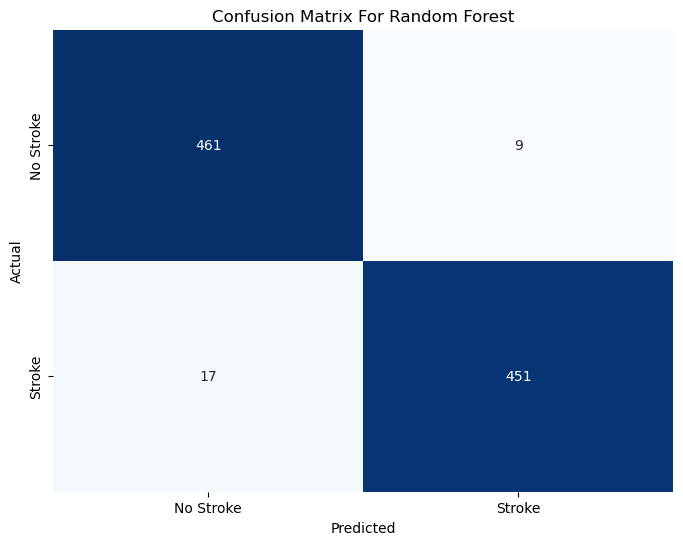

In [39]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix For Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
#saving the model
import pickle

# Save the trained model
with open('GARO.pkl', 'wb') as model_file:
    pickle.dump(random_forest_en, model_file)

In [41]:
with open('GARO.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'], 
    'criterion': ['gini', 'entropy']
}

decision_tree_model = DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train.values.ravel())
print("Best Parameters:", grid_search.best_params_)

# Use the best model for prediction
best_decision_tree_model = grid_search.best_estimator_
y_pred = best_decision_tree_model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9360341151385928
Precision: 0.9454148471615721
Recall: 0.9252136752136753
F1 Score: 0.9352051835853132


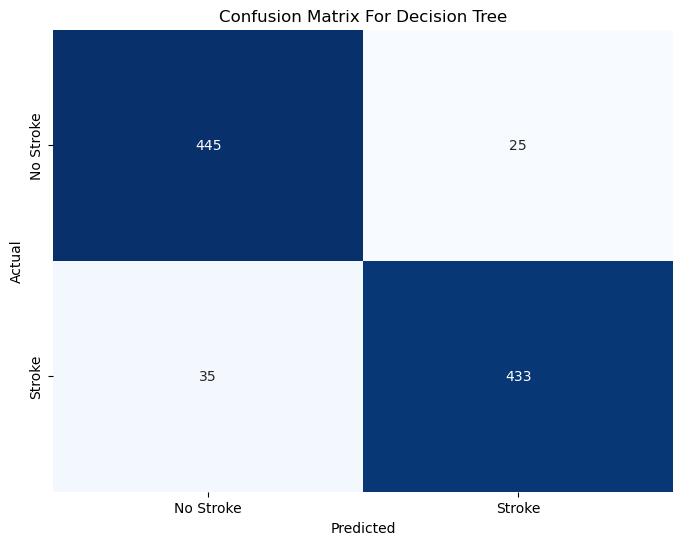

In [43]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix For Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()